# Simple HRP and CVaR



# <center>Portfolio Optimization</center>

Modern Portfolio Theory, or also known as mean-variance analysis is a mathematical process which allows the user to maximize returns for a given risk level.
Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows the set of optimal portfolios that offer the highest expected return for a given risk level or the lowest risk for a given level of expected return.
Portfolios that lie outside the efficient frontier are sub-optimal because they do not provide either enough return for the level of risk or have a higher risk for the defined rate of return.

In each of these cases, the task of optimizing assets involves balancing the trade-offs between risk and return, where return on a stock is the profits realized after a period of time and risk is the standard deviation in an asset's value.

In [2]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn  as sns
from plotly import express as px
import datetime as dt
import os
# -----------------------------------------
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
#-------------------------------------------
sns.set()

## Downloading Data from Yahoo!
1- Using `yf.download` <br>
2- Using `yfinance.Ticker(['list of stock names']).history('args')`<br>
3- Using `pandas_data_reader`<br>
OR
1- Using `yahoodownloader`

In [3]:
stocknames = ['MSFT','AAPL', 'GOOGL','HD', 'SBUX', 'TSLA', 'CVX', 'ABBV', 'KO'] # You can change them as you wish

startdate = '2010-01-01' # TRAIN
enddate = '2021-10-01' # TRAIN
interval = '1d'

## Downloading data using Using yf.download

In [4]:
def appending2(cols=[], startdate = '', enddate = ''):
    '''append stocks data into one file and then select the Adj Close column'''
    global df_
    dates = pd.date_range(start= startdate, end= enddate)
    df_ = pd.DataFrame(index= dates)
    for stock in stocknames:
        df_symbols = pd.read_csv(os.path.join('{}_test.csv'.format(stock)), index_col='Date', parse_dates=True, usecols=cols, na_values=['NaN'])
        df_symbols = df_symbols.rename(columns={'Adj Close' : stock})
        df_ = df_.join(df_symbols)
        df_ = df_.loc[dates]
        
    df_ = df_.dropna()
    return df_


def appending(cols=[], startdate = '', enddate = ''):
    '''append stocks data into one file and then select the Adj Close column'''
    global df
    dates = pd.date_range(start= startdate, end= enddate)
    df = pd.DataFrame(index= dates)
    for stock in stocknames:
        df_symbols = pd.read_csv(os.path.join('{}.csv'.format(stock)), index_col='Date', parse_dates=True, usecols=cols, na_values=['NaN'])
        df_symbols = df_symbols.rename(columns={'Adj Close' : stock})
        df = df.join(df_symbols)
        df = df.loc[dates]
    df = df.dropna()
    return df

In [5]:
yf.pdr_override()
for stock in stocknames:
    from pandas_datareader import data
    # df= data.DataReader(stock, 'yahoo', startdate, enddate)
    df = yf.download(stock, start=startdate, end=enddate)
    df.to_csv('{}.csv'.format(stock))


appending(['Date', 'Adj Close'], startdate, enddate)
df.index.names = ['Date']
df.head()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,MSFT,AAPL,GOOGL,HD,SBUX,TSLA,CVX,ABBV,KO
Date,,,,,,,,,
2013-01-02,22.57,16.77,18.10,49.71,22.59,2.36,70.24,22.42,26.82
2013-01-03,22.27,16.56,18.11,49.57,22.74,2.32,69.94,22.23,26.82
2013-01-04,21.86,16.10,18.47,49.47,22.87,2.29,70.31,21.95,26.86
2013-01-07,21.81,16.00,18.39,49.21,22.88,2.29,69.83,22.00,26.61
2013-01-08,21.70,16.04,18.35,49.51,22.84,2.25,69.52,21.52,26.42


In [6]:
# Fetch Test Data
test_start_date = '2022-01-03'
test_end_date = '2023-01-03'
yf.pdr_override()
for stock in stocknames:
    from pandas_datareader import data
    # df= data.DataReader(stock, 'yahoo', startdate, enddate)
    df__ = yf.download(stock, start=test_start_date, end=test_end_date)
    df__.to_csv('{}_test.csv'.format(stock))
print(df__.head())

df_ = appending2(['Date', 'Adj Close'], test_start_date, test_end_date)
df_.index.names = ['Date']
df_.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
            Open  High   Low  Close  Adj Close    Volume
Date                                                    
2022-01-03 58.82 59.31 58.38  59.30      56.28  20187300
2022-01-04 59.73 60.54 59.59  60.29      57.22  26141600
2022-01-05 60.09 61.20 60.05  60.79      57.69  22507300
2022-01-06 60.47 61.12 60.44  60.47      57.39  17902300
2022-01-07 60.28 60.72 60.06  60.33  

,MSFT,AAPL,GOOGL,HD,SBUX,TSLA,CVX,ABBV,KO
Date,,,,,,,,,
2022-01-03,328.73,179.95,144.99,390.42,111.63,399.93,110.76,125.28,56.28
2022-01-04,323.09,177.67,144.40,394.44,109.29,383.20,112.78,125.04,57.22
2022-01-05,310.69,172.94,137.77,389.09,105.66,362.71,113.51,125.70,57.69
2022-01-06,308.23,170.06,137.75,387.67,106.33,354.90,114.48,125.10,57.39
2022-01-07,308.39,170.23,137.02,376.06,102.91,342.32,116.12,124.78,57.26


In [7]:
# Get the Dow Jones Industrial Average (DJIA) data
dji = yf.download('^DJI', start=test_start_date, end=test_end_date)
dji.to_csv('DJI.csv')
print(dji.head())
# Calculate final return of DJIA
dji_final = dji['Adj Close'][-1] / dji['Adj Close'][0] - 1
dji_final


[*********************100%%**********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2022-01-03 36,321.59 36,595.82 36,246.45 36,585.06  36,585.06  347930000
2022-01-04 36,636.00 36,934.84 36,636.00 36,799.65  36,799.65  435080000
2022-01-05 36,722.60 36,952.65 36,400.39 36,407.11  36,407.11  462040000
2022-01-06 36,409.05 36,464.19 36,200.68 36,236.47  36,236.47  385890000
2022-01-07 36,249.59 36,382.84 36,111.53 36,231.66  36,231.66  356110000


-0.09396755740982465

### Hierarchical Risk Parity (HRP)<br>
The HRP method works by finding subclusters of similar assets based on returns and constructing a hierarchy from these clusters to generate weights for each asset. <br>
HRP does not require inverting of a covariance matrix, which is a measure of how stock returns move in the same direction.<br>
HRP is not as sensitive to outliers.

In [8]:
df.head()

,MSFT,AAPL,GOOGL,HD,SBUX,TSLA,CVX,ABBV,KO
Date,,,,,,,,,
2013-01-02,22.57,16.77,18.10,49.71,22.59,2.36,70.24,22.42,26.82
2013-01-03,22.27,16.56,18.11,49.57,22.74,2.32,69.94,22.23,26.82
2013-01-04,21.86,16.10,18.47,49.47,22.87,2.29,70.31,21.95,26.86
2013-01-07,21.81,16.00,18.39,49.21,22.88,2.29,69.83,22.00,26.61
2013-01-08,21.70,16.04,18.35,49.51,22.84,2.25,69.52,21.52,26.42


In [9]:
daily_returns = df.pct_change().dropna()

In [11]:
from pypfopt import HRPOpt
# run the optimization algorithm to get the weights:
hrp = HRPOpt(daily_returns)
hrp_weights = hrp.optimize()

# performance of the portfolio and the weights:
hrp.portfolio_performance(verbose=True)
hrp_weights = dict(hrp_weights)
print(hrp_weights)

Expected annual return: 20.1%
Annual volatility: 17.2%
Sharpe Ratio: 1.05
{'AAPL': 0.08083392454851554, 'ABBV': 0.13970961644181937, 'CVX': 0.1095001135299918, 'GOOGL': 0.10418358530231756, 'HD': 0.0845078241986353, 'KO': 0.2775657045206734, 'MSFT': 0.09581210756933747, 'SBUX': 0.0730740321577449, 'TSLA': 0.03481309173096468}


In [12]:
# SANITY CHECK: SHOULD BE 1
sum(hrp_weights.values())

1.0

Finally, let’s calculate the discrete allocation using our weights:

In [13]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
da_hrp = DiscreteAllocation(hrp_weights, latest_prices, total_portfolio_value=10000)

allocation, leftover = da_hrp.greedy_portfolio()
print("Discrete allocation (HRP):", allocation)
print("Funds remaining (HRP): ${:.2f}".format(leftover))

Discrete allocation (HRP): {'KO': 56, 'ABBV': 14, 'CVX': 11, 'GOOGL': 7, 'MSFT': 4, 'HD': 3, 'AAPL': 6, 'SBUX': 7, 'TSLA': 1}
Funds remaining (HRP): $17.51


### Plot the results on the test frame

36585.05859375


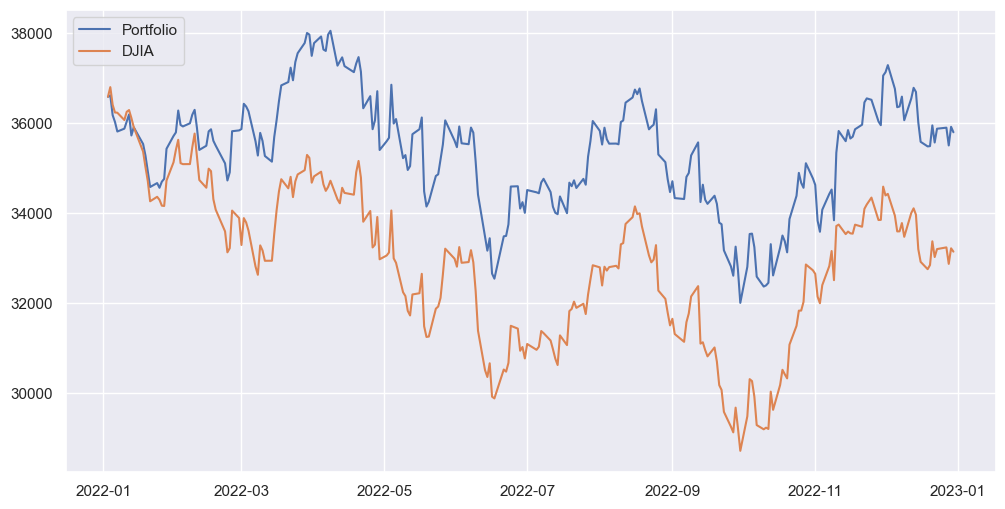

Sharpe Ratio:  -0.0009059662166011382
Initial Valuation:  11886.11026763916
End Valuation:  11630.27668762207
Return:  -0.02152374277677839
DJI Return:  -0.09396755740982465


In [14]:
# Test
# Buying Valuation
# Multiply the contents of allocation with the first row of df_
init_valuation = 0
for key in allocation:
    init_valuation += allocation[key] * df_.iloc[0][key]

end_valuation = 0
for key in allocation:
    end_valuation += allocation[key] * df_.iloc[-1][key]

# Add a portfolio progression column to df_
portfolio_progression = []
for i in range(len(df_)):
    portfolio_progression.append(0)
    for key in allocation:
        portfolio_progression[i] += allocation[key] * df_.iloc[i][key]



factor = dji['Adj Close'][0] / portfolio_progression[0]


df_['Portfolio Progression'] = [x * factor for x in portfolio_progression]
daily_returns = df_.pct_change().dropna()
dji['Adj Close'] = dji['Adj Close'] 
print(dji['Adj Close'][0])
# df_['Portfolio Progression'] = portfolio_progression
plt.figure(figsize=(12, 6))
plt.plot(df_['Portfolio Progression'])
plt.plot(dji['Adj Close'])
plt.legend(['Portfolio', 'DJIA'])
plt.show()

end_valuation = portfolio_progression[-1]
init_valuation = portfolio_progression[0]

print("Sharpe Ratio: ", df_['Portfolio Progression'].pct_change().mean() / df_['Portfolio Progression'].pct_change().std())
print('Initial Valuation: ', init_valuation)
print('End Valuation: ', end_valuation)
print('Return: ', (end_valuation - init_valuation)/init_valuation)
print('DJI Return: ', dji_final)

# Put DJIA and Portfolio Progression in the same dataframe
result_df = pd.DataFrame({
    'Date': df_.index,
    'Portfolio Progression': df_['Portfolio Progression'],
    'DJIA': dji['Adj Close']
})
# print(result_df.head())

result_df.to_csv('hrp.csv', index=False)

### Mean Conditional Value at Risk (mCVAR)
mCVaR works by measuring the worst-case scenarios for each asset in the portfolio, which is represented here by losing the most money. The worst-case loss for each asset is then used to calculate weights to be used for allocation for each asset. <br>

Calculate the weights and get the performance:

In [15]:
from pypfopt.efficient_frontier import EfficientCVaR
from pypfopt.expected_returns import mean_historical_return

mu= mean_historical_return(df)
S = df.cov()
ef_cvar = EfficientCVaR(mu, S)
cvar_weights = ef_cvar.min_cvar()

cleaned_weights = ef_cvar.clean_weights()
print(dict(cleaned_weights))
round(np.mean(ef_cvar.expected_returns) *100,2)

{'MSFT': 0.0, 'AAPL': 0.0, 'GOOGL': 0.0, 'HD': 1.0, 'SBUX': 0.0, 'TSLA': 0.0, 'CVX': 0.0, 'ABBV': 0.0, 'KO': 0.0}


c:\Users\vijay\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


25.47

Next, get the discrete allocation:

In [16]:
np.seterr(invalid= 'ignore')
da_cvar = DiscreteAllocation(cvar_weights, latest_prices, total_portfolio_value=10000)
allocation, leftover = da_cvar.greedy_portfolio()
print("Discrete allocation (CVAR):", allocation)
print("Funds remaining (CVAR): ${:.2f}".format(leftover))

Discrete allocation (CVAR): {'HD': 32}
Funds remaining (CVAR): $5.27


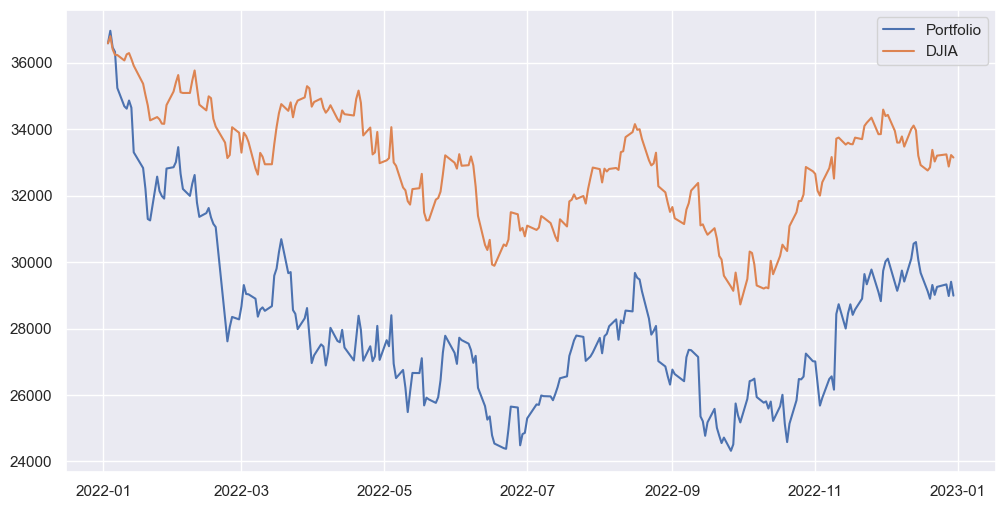

Sharpe Ratio:  -0.03722326905133477
Initial Valuation:  12493.5625
End Valuation:  9899.90625
Return:  -0.20759941369805449
DJI Return:  -0.09396755740982465
                 Date  Portfolio Progression      DJIA
Date                                                  
2022-01-03 2022-01-03              36,585.06 36,585.06
2022-01-04 2022-01-04              36,961.08 36,799.65
2022-01-05 2022-01-05              36,459.72 36,407.11
2022-01-06 2022-01-06              36,327.22 36,236.47
2022-01-07 2022-01-07              35,239.44 36,231.66


In [17]:
# Again, find the portfolio progression
portfolio_progression = []
for i in range(len(df_)):
    portfolio_progression.append(0)
    for key in allocation:
        portfolio_progression[i] += allocation[key] * df_.iloc[i][key]

factor = dji['Adj Close'][0] / portfolio_progression[0]

dji['Adj Close'] = dji['Adj Close'] 

df_['Portfolio Progression'] = [x * factor for x in portfolio_progression]
plt.figure(figsize=(12, 6))
plt.plot(df_['Portfolio Progression'])
plt.plot(dji['Adj Close'])
plt.legend(['Portfolio', 'DJIA'])
plt.show()

end_valuation = portfolio_progression[-1]
init_valuation = portfolio_progression[0]

print("Sharpe Ratio: ", df_['Portfolio Progression'].pct_change().mean() / df_['Portfolio Progression'].pct_change().std())
print('Initial Valuation: ', init_valuation)
print('End Valuation: ', end_valuation)
print('Return: ', (end_valuation - init_valuation)/init_valuation)
print('DJI Return: ', dji_final)


# Put DJIA and Portfolio Progression in the same dataframe
result_df = pd.DataFrame({
    'Date': df_.index,
    'Portfolio Progression': df_['Portfolio Progression'],
    'DJIA': dji['Adj Close']
})
print(result_df.head())

result_df.to_csv('cvar.csv', index=False)


----------------------------------

## Plot for the Efficient Frontier

*Portfolio expected returns*<br>
The mean of returns (given by change in prices of asset stock prices) give us the expected returns of that asset.

In [18]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last()
print (ind_er)
ind_er= ind_er.pct_change().mean()

ind_er.to_frame()

             MSFT   AAPL  GOOGL     HD   SBUX   TSLA    CVX  ABBV    KO
Date                                                                   
2013-12-31  31.50  17.57  28.05  65.82  32.62  10.03  82.09 35.06 30.31
2014-12-31  40.18  24.70  26.53  85.72  34.66  14.83  76.36 44.85 31.91
2015-12-31  49.30  23.96  38.90 110.17  51.37  16.00  64.01 41.93 33.55
2016-12-31  56.74  26.95  39.62 114.07  48.22  14.25  87.48 46.04 33.43
2017-12-31  79.85  40.01  52.67 164.96  50.80  20.76  96.74 73.69 38.24
2018-12-31  96.45  37.85  52.25 152.93  58.29  22.19  87.31 72.99 40.83
2019-12-31 151.97  71.52  66.97 199.66  81.07  27.89 100.65 74.06 49.24
2020-12-31 216.60 130.39  87.63 248.59 100.68 235.22  74.53 94.59 50.46
2021-12-31 276.34 139.70 133.68 312.34 105.08 258.49  93.14 98.60 49.41


,0
MSFT,0.32
AAPL,0.34
GOOGL,0.23
HD,0.23
SBUX,0.17
TSLA,1.10
CVX,0.04
ABBV,0.15
KO,0.07


In [19]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
ann_sd

MSFT    0.26
AAPL    0.28
GOOGL   0.25
HD      0.23
SBUX    0.24
TSLA    0.55
CVX     0.29
ABBV    0.28
KO      0.18
dtype: float64

In [20]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
MSFT,0.32,0.26
AAPL,0.34,0.28
GOOGL,0.23,0.25
HD,0.23,0.23
SBUX,0.17,0.24
TSLA,1.10,0.55
CVX,0.04,0.29
ABBV,0.15,0.28
KO,0.07,0.18


Next, to plot the graph of efficient frontier, we need run a loop. In each iteration, the loop considers different weights for assets and calculates the return and volatility of that particular portfolio combination.

Random weights summing to 1 are used.

In [21]:

p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights
# df.drop(columns=['Portfolio Progression'], inplace=True)
print(df.head())
print(len(df.columns))
num_assets = len(df.columns)
num_portfolios = 10_000

# Log of percentage change
cov_matrix = daily_returns.cov()
# Remove last row only
cov_matrix = cov_matrix.iloc[:-1,:-1]
print(cov_matrix)

            MSFT  AAPL  GOOGL    HD  SBUX  TSLA   CVX  ABBV    KO
Date                                                             
2013-01-02 22.57 16.77  18.10 49.71 22.59  2.36 70.24 22.42 26.82
2013-01-03 22.27 16.56  18.11 49.57 22.74  2.32 69.94 22.23 26.82
2013-01-04 21.86 16.10  18.47 49.47 22.87  2.29 70.31 21.95 26.86
2013-01-07 21.81 16.00  18.39 49.21 22.88  2.29 69.83 22.00 26.61
2013-01-08 21.70 16.04  18.35 49.51 22.84  2.25 69.52 21.52 26.42
9
       MSFT  AAPL  GOOGL   HD  SBUX  TSLA  CVX  ABBV   KO
MSFT   0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
AAPL   0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
GOOGL  0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
HD     0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
SBUX   0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
TSLA   0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
CVX    0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
ABBV   0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
KO     0.00  0

In [22]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [23]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios  = pd.DataFrame(data)
print(portfolios.head())

   Returns  Volatility  MSFT weight  AAPL weight  GOOGL weight  HD weight  \
0     0.32        0.27         0.04         0.09          0.17       0.12   
1     0.35        0.28         0.18         0.07          0.11       0.17   
2     0.22        0.23         0.04         0.04          0.14       0.18   
3     0.39        0.29         0.16         0.16          0.08       0.09   
4     0.28        0.23         0.03         0.17          0.03       0.20   

   SBUX weight  TSLA weight  CVX weight  ABBV weight  KO weight  
0         0.19         0.14        0.10         0.05       0.11  
1         0.13         0.15        0.04         0.10       0.06  
2         0.19         0.05        0.19         0.14       0.02  
3         0.03         0.20        0.04         0.06       0.19  
4         0.04         0.10        0.08         0.17       0.18  


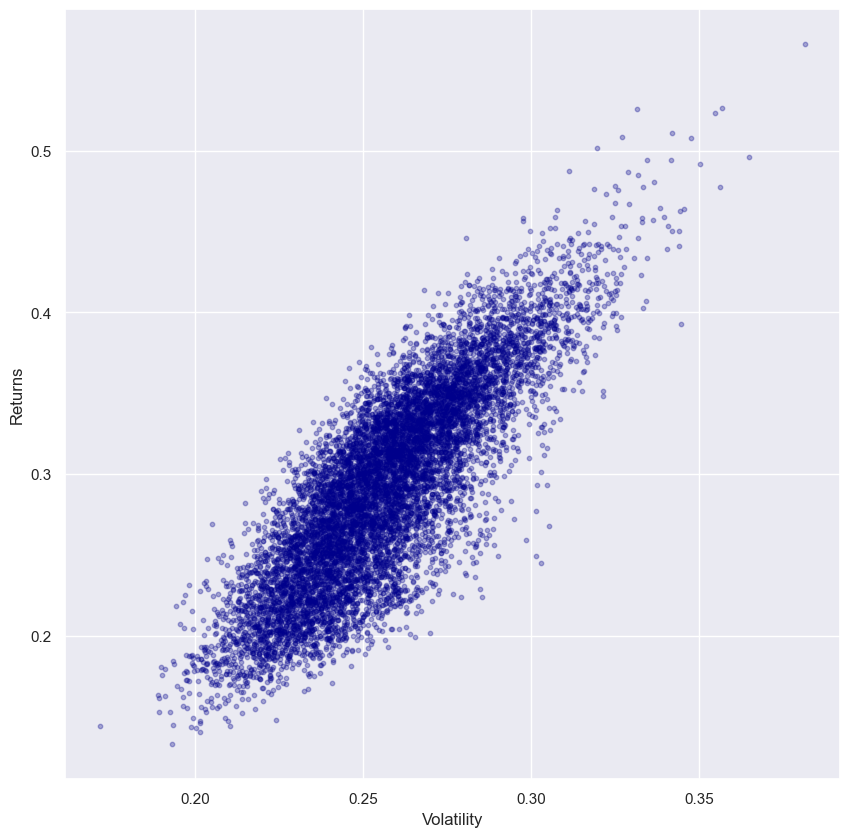

In [24]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10], color='darkblue');

In [25]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns        0.14
Volatility     0.17
MSFT weight    0.02
AAPL weight    0.03
GOOGL weight   0.02
HD weight      0.07
SBUX weight    0.03
TSLA weight    0.02
CVX weight     0.13
ABBV weight    0.35
KO weight      0.32
Name: 2924, dtype: float64

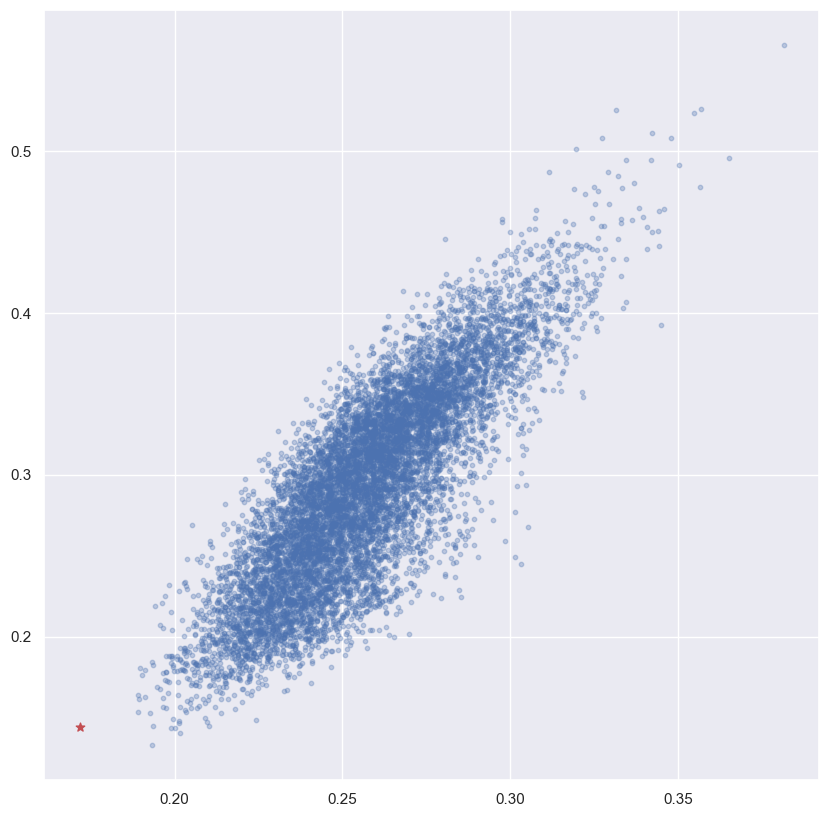

In [26]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=40);

In [27]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        0.53
Volatility     0.33
MSFT weight    0.12
AAPL weight    0.09
GOOGL weight   0.01
HD weight      0.05
SBUX weight    0.01
TSLA weight    0.38
CVX weight     0.17
ABBV weight    0.13
KO weight      0.05
Name: 8732, dtype: float64

Text(0, 0.5, 'Returns')

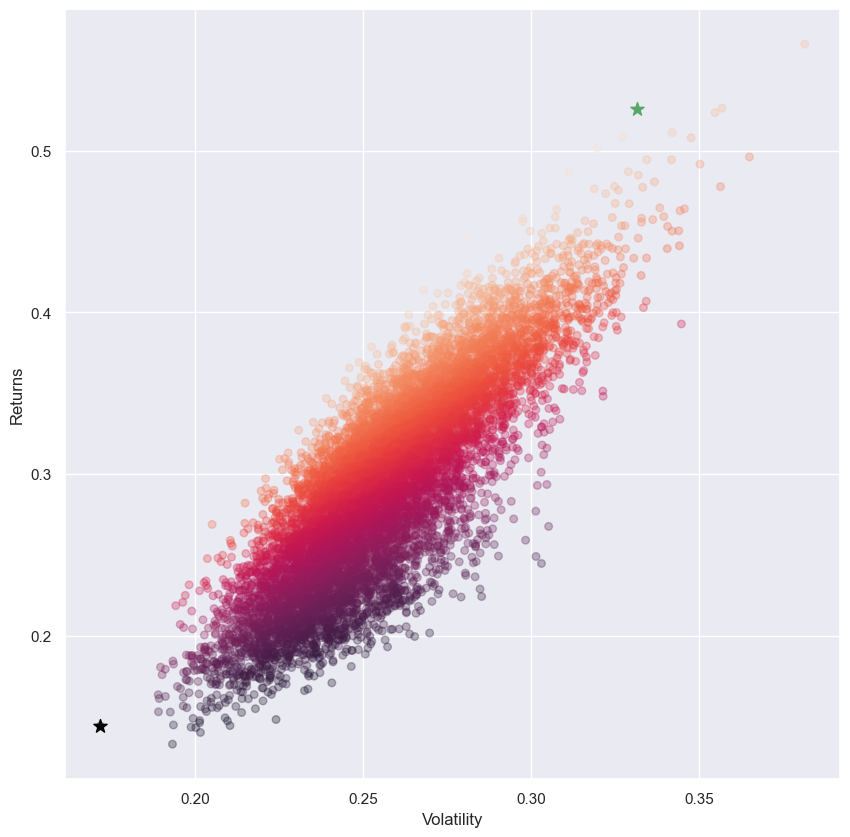

In [28]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
sharpe_err = portfolios['Returns'] / portfolios['Volatility']
plt.scatter(portfolios['Volatility'], portfolios['Returns'], c=sharpe_err, s=30, alpha=0.3,)
plt.scatter(min_vol_port[1], min_vol_port[0], color='black', marker='*', s=100)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=100)
plt.xlabel('Volatility')
plt.ylabel('Returns')

--------------------------